In [1]:
from luxai_s2.env import LuxAI_S2
from luxai_s2.map_generator.generator import GameMap
from luxai_s2.map.board import Board
from agents_experiments import reset_w_custom_board
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# key-values of dict below should match attributes present in this class
# https://github.com/aernesto/Lux-Design-S2/blob/adrian/luxai_s2/luxai_s2/config.py#L34
environment_config = dict(
        max_episode_length=350,  # how many total turns in game
        CYCLE_LENGTH=50,
        DAY_LENGTH=50,  # so no night
        MAX_RUBBLE=0,  # disable rubble   
        MIN_FACTORIES=2,  
        MAX_FACTORIES=2
    )
env = LuxAI_S2(**environment_config)
custom_rubble = np.zeros((env.env_cfg.map_size,) * 2, dtype=np.int64)

# Let's put a single ice at 30,30
custom_ice = np.zeros_like(custom_rubble)
custom_ice[30, 30] = 1

# Let's put a single ore at 21, 21
custom_ore = np.zeros_like(custom_rubble)
custom_ore[21, 21] = 1

custom_symmetry = None


custom_map_ = GameMap(custom_rubble, custom_ice, custom_ore, custom_symmetry)

simple_board = Board(
    seed=env.seed_rng.randint(0, 2**32 - 1, dtype=np.int64), 
    env_cfg=env.env_cfg,
    existing_map=custom_map_
)

obs, env = reset_w_custom_board(env, seed=41, custom_board=simple_board)
    
# source code of reset() method: 
# https://github.com/aernesto/Lux-Design-S2/blob/adrian/luxai_s2/luxai_s2/env.py#L175
# obs = env.reset(seed=41) # resets an environment with a seed

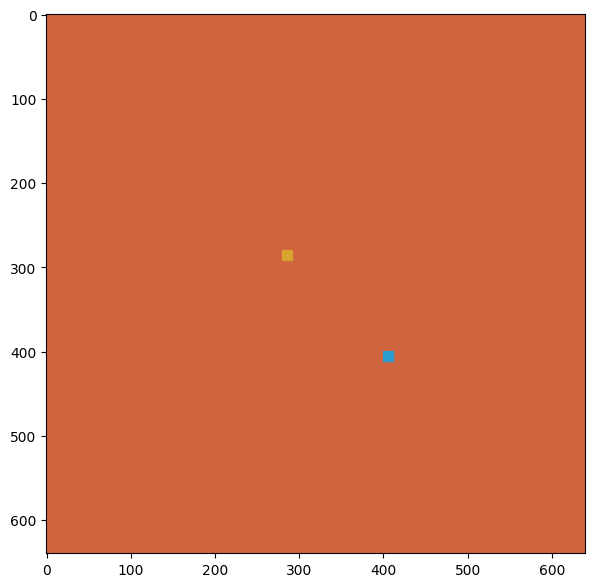

In [3]:
img = env.render("rgb_array", width=640, height=640)
f, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img);